     Data Science for Finance Postgraduate
     Computational Finance T1 2024/25
     Individual Assignment - Francisco Perestrello, 20241560

### Consider the following rates for different days  

or (with provided file "ha_cf_2024.py" in working path"

In [1]:
from ha_cf_2024 import *

#### a) Build a pandas dataframe with the data using the dates as columns and year fractions of the tenors as index

In [2]:
import pandas as pd

def tenor_to_year_fraction(tenor):
    if tenor.endswith('M'):
        return int(tenor[:-1]) / 12
    elif tenor.endswith('Y'):
        return int(tenor[:-1])
    
yield_rates = pd.DataFrame(data, index=dates, columns=[tenor_to_year_fraction(tenor) for tenor in tenors]).T / 100
yield_rates.index.rename('Year Fraction', inplace=True)
yield_rates

,09-10-2020,09-09-2020,07-08-2020,09-07-2020,09-06-2020
Year Fraction,,,,,
0.25,-0.00545,-0.00504,-0.00502,-0.00462,-0.00455
0.50,-0.00529,-0.00499,-0.00491,-0.00459,-0.00446
1.00,-0.00523,-0.00499,-0.00476,-0.00447,-0.00421
2.00,-0.00604,-0.00561,-0.00462,-0.00485,-0.00352
3.00,-0.00471,-0.00386,-0.00328,-0.00350,-0.00235
4.00,-0.00436,-0.00327,-0.00319,-0.00310,-0.00196
5.00,-0.00329,-0.00179,-0.00209,-0.00114,0.00058
6.00,-0.00237,-0.00097,-0.00142,-0.00053,0.00138
7.00,-0.00118,0.00076,0.00020,0.00139,0.00230


#### b) Plot the yield curve for each date

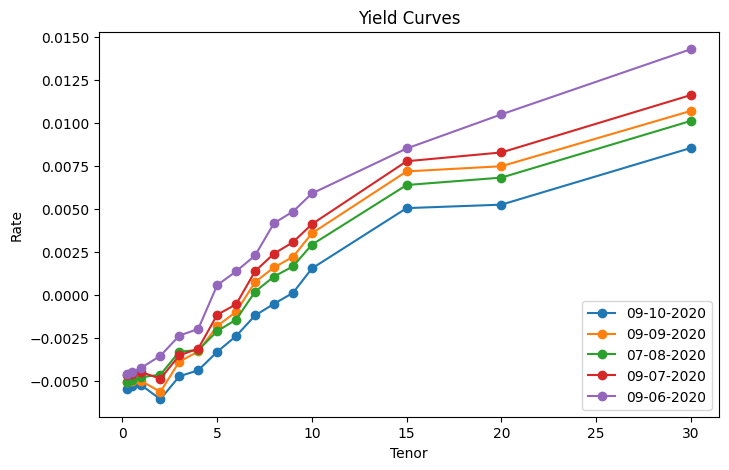

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.xlabel('Tenor')
plt.ylabel('Rate')
plt.title('Yield Curves')

for date in yield_rates:
    plt.plot(yield_rates.index, yield_rates[date], 'o-', label=date)

plt.legend(loc='lower right')

#### c) Estimate the NSS parameters for each date

In [14]:
import numpy as np
from scipy.optimize import minimize
np.random.seed(123)

def nss(p, term):
    beta0, beta1, beta2, beta3, tau1, tau2 = p
    return (beta0
            +beta1*(1-np.exp(-term/tau1))/(term/tau1)
            +beta2*((1-np.exp(-term/tau1))/(term/tau1)-np.exp(-term/tau1))
            +beta3*((1-np.exp(-term/tau2))/(term/tau2)-np.exp(-term/tau2)))

def error(p, x, y): return ((nss(p, x) - y)**2).sum()

NSS_params = []
bounds = [(None, None), # beta0
          (None, None), # beta1
          (None, None), # beta2
          (None, None), # beta3
          (0, None), # tau1 (must be positive)
          (0, None)] # tau2 (must be positive)
n_initial_guesses = 10
                                                          
# try different initial guesses and keep the one with the lowest error at the end
for date in yield_rates:
    x = yield_rates.index
    y = yield_rates[date]

    best_params = None
    best_error = float('inf')

    for n in range(n_initial_guesses):
        initial_guess = np.random.rand(1,6)
        p = minimize(error, initial_guess, args=(x, y), bounds=bounds)

        if p.success and p.fun < best_error:
            best_error = p.fun
            best_params = p.x

    NSS_params.append(best_params)

parameter_names = ['beta0', 'beta1', 'beta2', 'beta3', 'tau1', 'tau2']
NSS_params = pd.DataFrame(NSS_params, columns=parameter_names, index=yield_rates.columns)
NSS_params

C:\Users\Francisco\AppData\Local\Temp\ipykernel_48148\2318564063.py:33: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  p = minimize(error, initial_guess, args=(x, y), bounds=bounds)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_48148\2318564063.py:33: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  p = minimize(error, initial_guess, args=(x, y), bounds=bounds)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_48148\2318564063.py:33: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  p = minimize(error, initial_guess, args=(x, y), bounds=bounds)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_48148\2318

C:\Users\Francisco\AppData\Local\Temp\ipykernel_48148\2318564063.py:33: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  p = minimize(error, initial_guess, args=(x, y), bounds=bounds)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_48148\2318564063.py:33: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  p = minimize(error, initial_guess, args=(x, y), bounds=bounds)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_48148\2318564063.py:33: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  p = minimize(error, initial_guess, args=(x, y), bounds=bounds)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_48148\2318

,beta0,beta1,beta2,beta3,tau1,tau2
09-10-2020,0.011920,-0.017028,-0.073794,0.046633,2.270260,1.979381
09-09-2020,0.013953,-0.018634,-0.029242,0.002550,2.370891,1.033653
07-08-2020,0.013525,-0.018686,0.329895,-0.357542,1.985842,2.051006
09-07-2020,0.014714,-0.019242,0.002362,-0.044222,1.023225,2.091631
09-06-2020,0.019425,-0.023730,-0.006188,-0.008704,5.200920,1.804072


Since we are optimizing all the parameters, the initial guess may condition the optimization result (local minima).
Here we chose a suitable initial guess but one alternative would be to try run optimization with several random initial guesses and keep the one with the minimum error.

#### d) Plot the NSS Yield Curve for each date

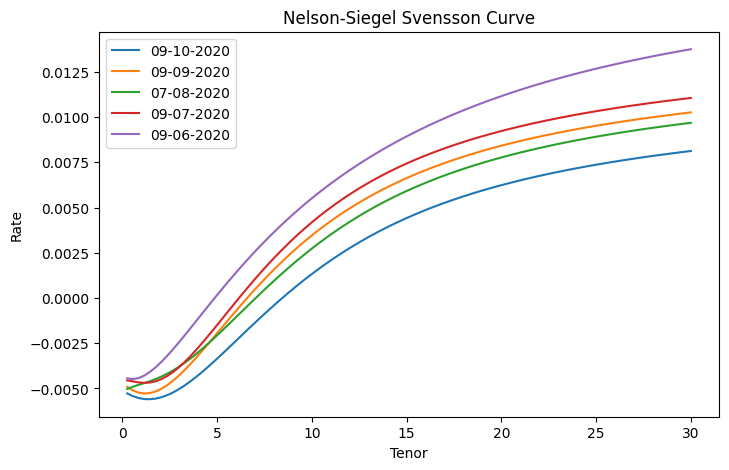

In [15]:
plt.figure(figsize=(8,5))

tenors = yield_rates.index
for date in NSS_params.index:
    params = NSS_params.loc[date]
    xx = np.linspace(tenors.min(), tenors.max(), 100)
    nss_yc = np.array([nss(params, t) for t in xx])
    plt.plot(xx, nss_yc, label=date)

plt.title('Nelson-Siegel Svensson Curve')
plt.xlabel('Tenor')
plt.ylabel('Rate')
plt.legend()

#### e) Plot the evolution of the 9M, 3.5Y, 12.5Y and the 25Y rate over the curve dates (a line for each tenor)

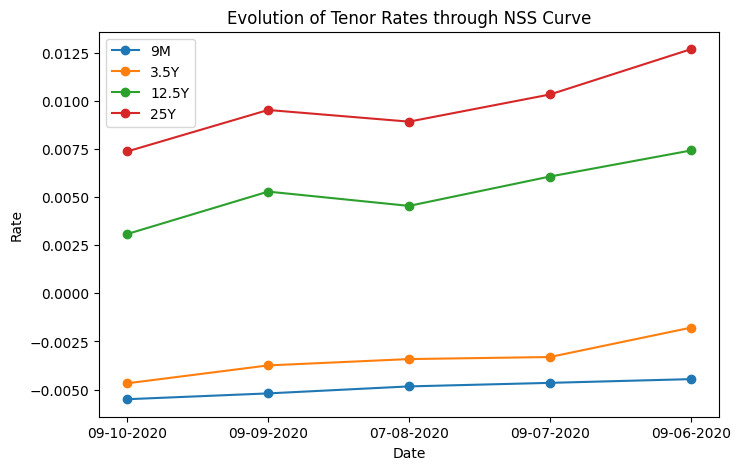

In [16]:
plt.figure(figsize=(8,5))
xx = np.array([0.75, 3.5, 12.5, 25])
evolution = pd.DataFrame(index=NSS_params.index, columns=xx)

for date in NSS_params.index:
    params = NSS_params.loc[date]
    nss_yc = np.array([nss(params, t) for t in xx])
    evolution.loc[date] = nss_yc


plt.plot(evolution.index, evolution, 'o-', label=["9M","3.5Y","12.5Y","25Y"])
plt.title('Evolution of Tenor Rates through NSS Curve')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()


#### f) Plot the market data points vs the NSS fit for each date using 5 subplots sharing the y axis (One market date in each subplot)

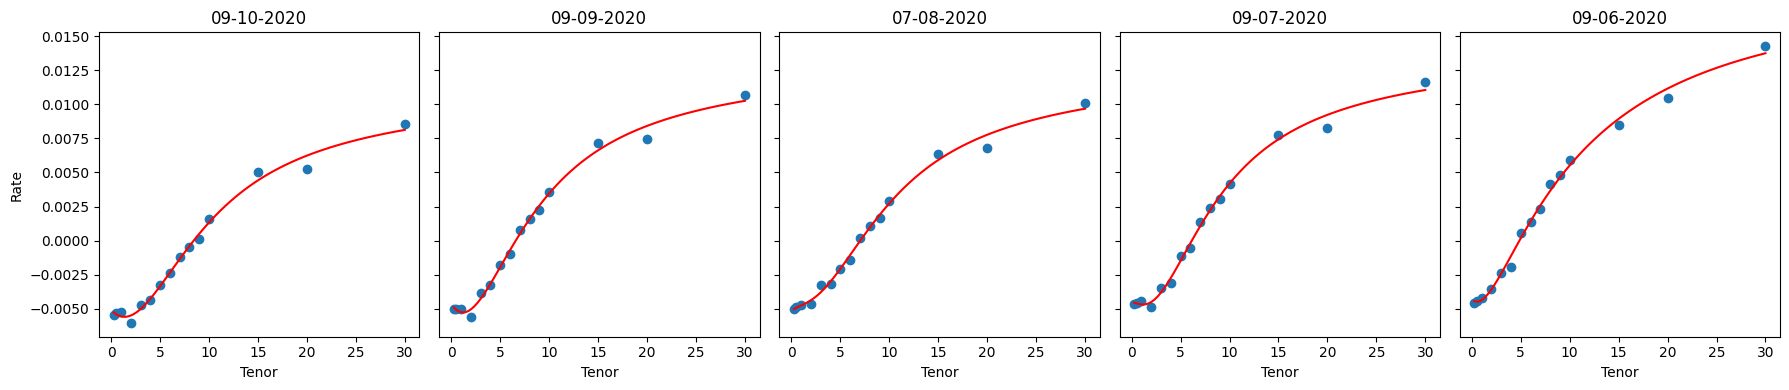

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(18, 4), sharey=True)

tenors = yield_rates.index
for i, date in enumerate(NSS_params.index):   
    params = NSS_params.loc[date]
    xx = np.linspace(tenors.min(), tenors.max(), 100)
    nss_yc = np.array([nss(params, t) for t in xx])

    axis = ax[i]
    axis.scatter(tenors, yield_rates[date])
    axis.plot(xx, nss_yc, label=date, color='red')

    axis.set_title(f'{date}')
    axis.set_xlabel('Tenor')

ax[0].set_ylabel('Rate')
plt.tight_layout()

#### g) Make a function that will give the daycount fraction between two dates for either convention Act/360 or Act/365 using date strings as inputs

Example: dayCount('15-06-2020', '15-12-2021', 'Act/360')

In [177]:
from datetime import datetime

def dayCount(start_date_str, end_date_str, act):
    start_date = datetime.strptime(start_date_str, "%d-%m-%Y")
    end_date = datetime.strptime(end_date_str, "%d-%m-%Y")
    diff = (end_date - start_date).days
    if act == 'Act/360':
        return round(diff/360, 2)
    elif act == 'Act/365':
        return round(diff/365, 2)
    else:
        raise ValueError(f"Invalid act convention: '{act}'. Expected 'Act/360' or 'Act/365'.")

dayCount('15-06-2020','15-12-2021','Act/365')

1.5

#### h) Make a function that not only returns the present value of a future investment for a given rate but also prints a custom string. Use it to determine the present value of a payment of EUR 2,430.04 in 5 years at the rate of 5% (Annual compounded rate) and print whatever string you want

Ex: pv(amount, rate, maturity, text)

In [11]:
def pv(amount, rate, maturity, text):
    pv = amount / (1+rate)**maturity
    print(f'{text}')
    return (f'EUR {round(pv, 2)}')

pv(2430.04, 0.05, 5, "I see what you did here, Professor. Very funny. Present Value:")

I see what you did here, Professor. Very funny. Present Value:


'EUR 1904.0'